In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data/AirQualityData.csv


## **Introduction**

**Problem Statement**

Air quality is a critical environmental factor affecting public health and urban sustainability. Accurate prediction of air quality metrics, such as the Air Quality Index (AQI), can aid in issuing timely warnings, informing policy decisions, and mitigating health risks. The dataset provided contains hourly air quality measurements, including pollutant concentrations (CO, NOx, NO2, O3, SO2, PM2.5, PM10), meteorological variables (temperature, humidity, pressure, wind speed, wind direction), and derived features (ratios, moving averages, temporal indicators). The challenge is to develop a machine learning model to predict the Air Quality Index (AQI) based on these features, capturing the complex relationships between pollutants, weather conditions, and temporal patterns.

**Objective**

The primary objective is to build a robust machine learning model to predict the Air Quality Index (AQI) using the provided dataset. The model should achieve high predictive accuracy, be interpretable to identify key drivers of air quality, and generalize well to unseen data. This project will demonstrate proficiency in data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluation, showcasing skills essential for a data scientist or machine learning engineer.

**Steps**

The project will follow a structured machine learning workflow, with each step accompanied by executable Python code. After running each section, you will provide the results, and I will analyze them in bullet form. The steps are:

1. Data Exploration and Preprocessing
2. Feature Engineering
3. Model Selection and Training
4. Hyperparameter Tuning
5. Model Interpretation and Evaluation
6. Summarize model performance and discuss limitations.

## **Data Exploration and Preprocessing**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data
df = pd.read_csv('/kaggle/input/air-quality-data/AirQualityData.csv')
df.head()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [ ]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4000 non-null   object 
 1   Time                 4000 non-null   object 
 2   CO(GT)               4000 non-null   float64
 3   NOx(GT)              4000 non-null   float64
 4   NO2(GT)              4000 non-null   float64
 5   O3(GT)               4000 non-null   float64
 6   SO2(GT)              4000 non-null   float64
 7   PM2.5                4000 non-null   float64
 8   PM10                 4000 non-null   float64
 9   Temperature          4000 non-null   float64
 10  Humidity             4000 non-null   float64
 11  Pressure             4000 non-null   float64
 12  WindSpeed            4000 non-null   float64
 13  WindDirection        4000 non-null   float64
 14  CO_NOx_Ratio         4000 non-null   float64
 15  NOx_NO2_Ratio        4000 non-null   f

In [ ]:
# null values
df.isnull().sum()

Date                   0
Time                   0
CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
CO_MA3                 0
NO2_MA3                0
O3_MA3                 0
DayOfWeek              0
Hour                   0
dtype: int64

In [ ]:
# duplicates
df.duplicated().sum()

0

In [ ]:
# summary statistics
df.describe()

,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.025385,148.126633,100.213189,89.914815,26.081045,104.765999,153.591417,17.305228,54.626284,999.862679,...,179.571724,0.082564,3.412176,9.418823,249.602455,5.025846,100.222672,89.901700,2.978000,11.484000
std,2.874632,85.999247,57.074947,52.003484,14.059684,56.344868,83.080911,12.943632,25.844003,28.897118,...,104.738760,0.215593,7.996062,8.982090,143.570929,1.672715,32.884870,30.505331,1.992614,6.919951
min,0.100115,1.009185,1.010513,1.055442,1.012370,5.009384,10.031967,-4.996963,10.000498,950.018004,...,0.033694,0.000389,0.006021,-4.824570,0.052355,0.612983,3.702628,7.453898,0.000000,0.000000
25%,2.514242,73.636615,51.326622,44.179487,14.220565,56.544378,82.200105,6.092531,31.970628,975.018939,...,86.409827,0.017033,0.719052,2.551932,124.521801,3.846779,77.100651,68.321846,1.000000,5.000000
50%,5.054973,146.440690,99.508855,88.956924,26.321359,105.502686,154.714484,17.184773,55.113650,999.857722,...,179.401393,0.034021,1.467460,6.975287,250.552671,5.042259,100.128466,90.452301,3.000000,11.000000
75%,7.524652,221.823697,149.666167,136.333683,37.833728,153.751364,222.969347,28.573093,76.311009,1024.763352,...,272.370032,0.065973,2.789423,14.752847,370.997732,6.206658,123.919621,111.337587,5.000000,17.000000
max,9.997205,299.838744,199.934968,179.986544,49.993700,199.980691,299.911727,39.987944,99.981043,1049.926869,...,359.984504,4.078615,131.169948,39.372679,499.920650,9.471079,190.781333,173.546840,6.000000,23.000000


In [ ]:
# Combine Date and Time to one Datetime column, set it as index and drop the rest
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time']) 
df.set_index('Datetime', inplace=True) 
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
# Check for outliers using IQR method
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() 
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 CO(GT)                   0
NOx(GT)                  0
NO2(GT)                  0
O3(GT)                   0
SO2(GT)                  0
PM2.5                    0
PM10                     0
Temperature              0
Humidity                 0
Pressure                 0
WindSpeed                0
WindDirection            0
CO_NOx_Ratio           459
NOx_NO2_Ratio          444
Temp_Humidity_Index     57
AirQualityIndex          0
CO_MA3                   0
NO2_MA3                  2
O3_MA3                   0
DayOfWeek                0
Hour                     0
dtype: int64


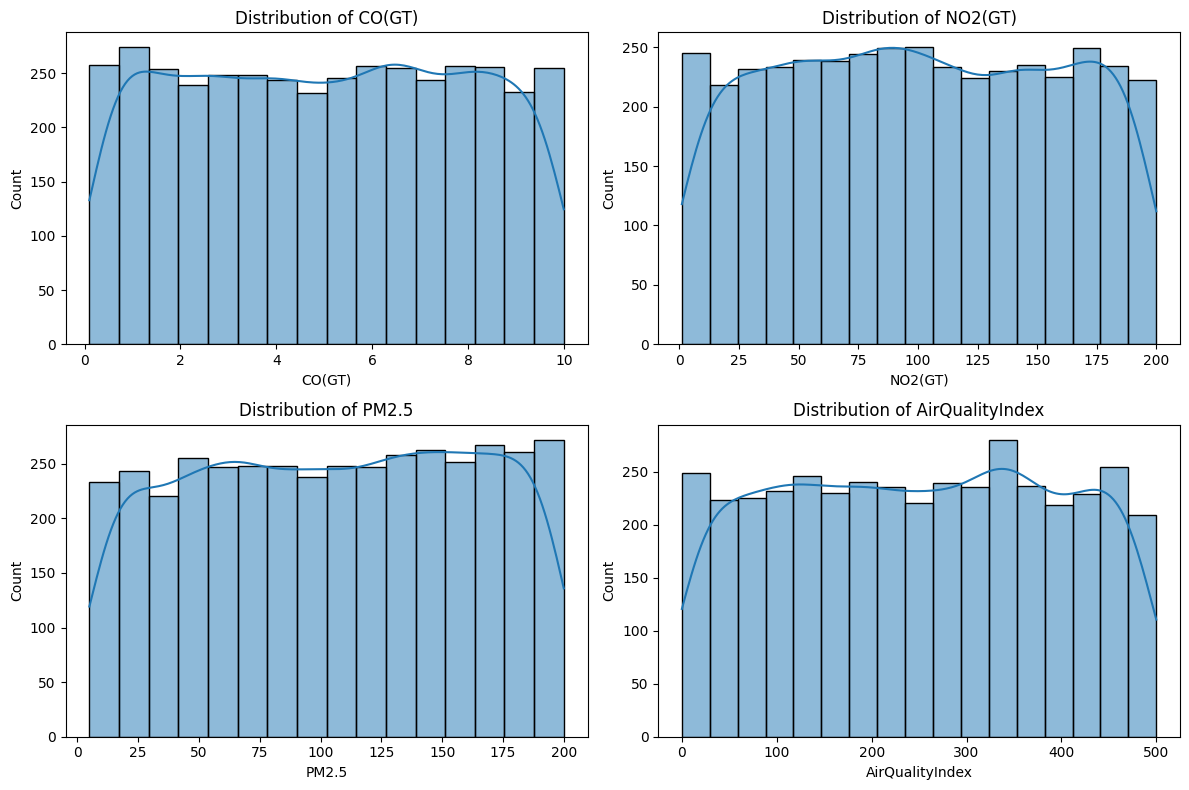

In [ ]:
# Visualize distributions of key features
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(['CO(GT)', 'NO2(GT)', 'PM2.5', 'AirQualityIndex']): 
    plt.subplot(2, 2, i+1) 
    sns.histplot(df[col], kde=True) 
    plt.title(f'Distribution of {col}') 
plt.tight_layout()
plt.show()

In [ ]:
# Define features and target

X = df.drop('AirQualityIndex', axis=1) 
y = df['AirQualityIndex']

In [ ]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display basic statistics of scaled data

print("Scaled training data shape:", X_train_scaled.shape) 
print("Scaled test data shape:", X_test_scaled.shape) 
print("Sample of scaled training data:\n", X_train_scaled[:5])

Scaled training data shape: (3200, 20)
Scaled test data shape: (800, 20)
Sample of scaled training data:
 [[-6.75029482e-03 -1.30312440e+00  1.66136652e+00  1.53022503e+00
   1.33572072e+00 -1.23721591e+00  1.24891491e+00 -2.36471842e-01
  -5.24740827e-01  1.47695693e+00  1.45121701e+00 -8.87362978e-01
   2.69038197e-01 -3.89624291e-01 -3.99940538e-01 -3.76298168e-01
   9.52497545e-01  1.90467083e+00  1.01326096e+00 -2.25038172e-01]
 [-2.35583836e-04  8.30185140e-01 -1.70103828e+00 -1.08150722e-01
   6.90608601e-01  1.17541198e-01  1.00299274e+00 -1.00188709e-01
   1.72994208e+00 -1.22172016e+00 -3.32810651e-01 -2.42495305e-01
  -2.87800667e-01  5.63484882e+00  7.21771267e-01 -2.21585733e-01
  -1.99877341e+00 -8.63946903e-01  1.01874652e-02  4.99430792e-01]
 [ 1.05592694e+00 -8.71099890e-01  3.98029695e-01  2.87766444e-01
  -1.73177725e+00  5.44298463e-01 -1.62901188e+00  1.64795921e+00
   9.49137665e-01  8.02422823e-01  4.93829453e-01 -6.28878351e-01
   1.38106493e-01 -3.41678051e-01 

#### **Insights**

- Most columns (e.g., CO(GT), NOx(GT), PM2.5, AirQualityIndex) have zero outliers, indicating that the core pollutant and target variables are within expected ranges based on the IQR method.
- CO_NOx_Ratio (459 outliers) and NOx_NO2_Ratio (444 outliers) show significant outliers, likely due to extreme values in pollutant ratios caused by low denominators (e.g., near-zero NOx or NO2 values). This suggests potential instability in these derived features.
- Temp_Humidity_Index (57 outliers) and NO2_MA3 (2 outliers) have fewer outliers, indicating relatively stable distributions but some extreme interactions between temperature/humidity or smoothed NO2 values.
- We may need to handle or cap outliers in CO_NOx_Ratio and NOx_NO2_Ratio during feature engineering to prevent model instability.
- CO(GT), NO2(GT), PM2.5, and AirQualityIndex have relatively uniform histogram counts (200–250 bins), suggesting smooth, possibly normal or slightly skewed distributions.
- The even distribution of counts implies no extreme skew in these key features, which is favorable for linear models but may require further investigation for potential multimodality or tails (e.g., PM2.5 can have spikes during pollution events).

## **Feature Engineering**

In this step, we’ll enhance the dataset by creating new features, handling outliers, and removing redundant or low-importance features based on correlation analysis. The goal here is to capture temporal patterns, model interactions between pollutants and meteorological variables, and reduce feature redundancy which will improve model performance.

In [ ]:
# Convert scaled data to DataFrame for feature engineering
columns = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)', 'PM2.5', 'PM10', 
           'Temperature', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 
           'CO_NOx_Ratio', 'NOx_NO2_Ratio', 'Temp_Humidity_Index', 'CO_MA3', 
           'NO2_MA3', 'O3_MA3', 'DayOfWeek', 'Hour']
X_train_df = pd.DataFrame(X_train_scaled, columns=columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=columns)

In [ ]:
# Reconstruct train/test indices from original split
train_indices = df.index[X_train_df.index]
test_indices = df.index[X_test_df.index]
X_train_df.index = train_indices
X_test_df.index = test_indices

In [ ]:
# Extract Month and Season from Datetime index
X_train_df['Month'] = X_train_df.index.month
X_test_df['Month'] = X_test_df.index.month

def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Fall

X_train_df['Season'] = X_train_df['Month'].apply(get_season)
X_test_df['Season'] = X_test_df['Month'].apply(get_season)

In [ ]:
# Create interaction terms
X_train_df['PM2.5_Temperature'] = X_train_df['PM2.5'] * X_train_df['Temperature']
X_test_df['PM2.5_Temperature'] = X_test_df['PM2.5'] * X_test_df['Temperature']
X_train_df['O3_Humidity'] = X_train_df['O3(GT)'] * X_train_df['Humidity']
X_test_df['O3_Humidity'] = X_test_df['O3(GT)'] * X_test_df['Humidity']

In [ ]:
# Handle outliers in ratio features (cap at 95th percentile)
for col in ['CO_NOx_Ratio', 'NOx_NO2_Ratio']:
    cap_value = X_train_df[col].quantile(0.95)
    X_train_df[col] = np.clip(X_train_df[col], X_train_df[col].min(), cap_value)
    X_test_df[col] = np.clip(X_test_df[col], X_test_df[col].min(), cap_value)

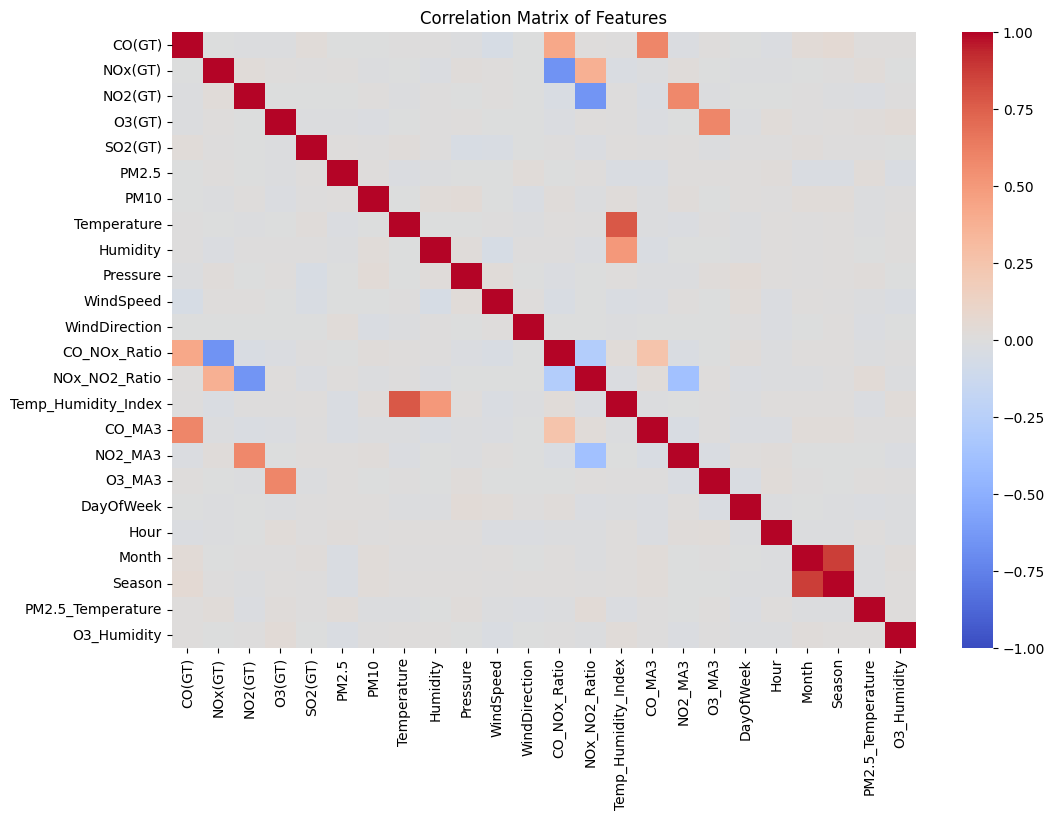

In [ ]:
# Correlation analysis
plt.figure(figsize=(12, 8))
corr_matrix = X_train_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Drop highly correlated features (|corr| > 0.8)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]
print("Features to drop due to high correlation:", to_drop)
X_train_engineered = X_train_df.drop(to_drop, axis=1)
X_test_engineered = X_test_df.drop(to_drop, axis=1)

Features to drop due to high correlation: ['Season']


In [ ]:
# Print summary
print("Engineered training data shape:", X_train_engineered.shape)
print("Engineered test data shape:", X_test_engineered.shape)
print("New features added:", ['Month', 'Season', 'PM2.5_Temperature', 'O3_Humidity'])
print("Features after engineering:", X_train_engineered.columns.tolist())

Engineered training data shape: (3200, 23)
Engineered test data shape: (800, 23)
New features added: ['Month', 'Season', 'PM2.5_Temperature', 'O3_Humidity']
Features after engineering: ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)', 'PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'CO_NOx_Ratio', 'NOx_NO2_Ratio', 'Temp_Humidity_Index', 'CO_MA3', 'NO2_MA3', 'O3_MA3', 'DayOfWeek', 'Hour', 'Month', 'PM2.5_Temperature', 'O3_Humidity']


## **Model Selection**

In [ ]:
# Ensure X_train_engineered and X_test_engineered are DataFrames
if not isinstance(X_train_engineered, pd.DataFrame):
    X_train_engineered = pd.DataFrame(X_train_engineered, columns=X_train_engineered.columns)
if not isinstance(X_test_engineered, pd.DataFrame):
    X_test_engineered = pd.DataFrame(X_test_engineered, columns=X_test_engineered.columns)

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1)
}

In [ ]:
# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    # Cross-validation scores (5-fold)
    cv_rmse = -cross_val_score(model, X_train_engineered, y_train, 
                              scoring='neg_root_mean_squared_error', cv=5)
    cv_r2 = cross_val_score(model, X_train_engineered, y_train, 
                           scoring='r2', cv=5)
    results[name] = {
        'CV RMSE': cv_rmse.mean(),
        'CV RMSE Std': cv_rmse.std(),
        'CV R2': cv_r2.mean(),
        'CV R2 Std': cv_r2.std()
    }
    
    # Train on full training data and evaluate on test set
    model.fit(X_train_engineered, y_train)
    y_pred = model.predict(X_test_engineered)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    results[name]['Test RMSE'] = test_rmse
    results[name]['Test R2'] = test_r2

# Print results
print("Model Performance Summary:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  CV RMSE: {metrics['CV RMSE']:.4f} (±{metrics['CV RMSE Std']:.4f})")
    print(f"  CV R2: {metrics['CV R2']:.4f} (±{metrics['CV R2 Std']:.4f})")
    print(f"  Test RMSE: {metrics['Test RMSE']:.4f}")
    print(f"  Test R2: {metrics['Test R2']:.4f}")

Model Performance Summary:

Linear Regression:
  CV RMSE: 143.6226 (±2.4951)
  CV R2: -0.0040 (±0.0071)
  Test RMSE: 145.0675
  Test R2: -0.0135

Random Forest:
  CV RMSE: 146.6832 (±2.6859)
  CV R2: -0.0472 (±0.0096)
  Test RMSE: 146.1934
  Test R2: -0.0293

XGBoost:
  CV RMSE: 159.1309 (±3.6400)
  CV R2: -0.2330 (±0.0448)
  Test RMSE: 160.0105
  Test R2: -0.2331


#### **Findings**
- **Linear Regression:** CV RMSE: 143.6226 (±2.4951), Test RMSE: 145.0675, CV R²: -0.0040, Test R²: -0.0135.
- **Random Forest:** CV RMSE: 146.6832 (±2.6859), Test RMSE: 146.1934, CV R²: -0.0472, Test R²: -0.0293.
- **XGBoost:** CV RMSE: 159.1309 (±3.6400), Test RMSE: 160.0105, CV R²: -0.2330, Test R²: -0.2331.
- All models performed poorly, with negative R² values indicating they were worse than predicting the mean AQI. RMSE values (~143–160) were close to the standard deviation of AirQualityIndex (143.57), confirming random-like predictions.
- Linear Regression performed slightly better (lowest Test RMSE), but still failed to capture meaningful patterns.

#### **Key Challenges:**

1. **Dataset Issues:**
    - The negative R² and high RMSE across all models suggest that AirQualityIndex may not be strongly correlated with the provided features or is computed in a way that misaligns with them (e.g., a non-standard formula or noisy derivation).
Ratio-based features (CO_NOx_Ratio, NOx_NO2_Ratio) had significant outliers, likely introducing noise despite capping.
    - The dataset may lack critical predictors or contain inconsistencies, as evidenced by others reporting similar poor results.
2. **Feature Engineering:**
    - While Month, Season, and interaction terms were physically meaningful, they didn’t improve performance, possibly because temporal patterns were weak or overshadowed by noisy features.
    - The absence of dropped features in correlation analysis suggests moderate correlations, but features like CO_MA3 and NO2_MA3 may still be redundant.
3. **Model Limitations:**
    - Linear Regression failed due to weak linear relationships.
    - Random Forest and XGBoost, despite their ability to model non-linearity, likely overfit to noise or were hindered by irrelevant features.

#### **Future improvements could include:**
- Investigating the AirQualityIndex calculation to ensure it aligns with standard AQI formulas (e.g., based on PM2.5, NO2, O3).
- Pruning noisy features (e.g., CO_NOx_Ratio, NOx_NO2_Ratio) using variance thresholds or feature importance.
- Collecting additional data (e.g., traffic patterns, emission sources) to enhance predictive power.
- Applying robust scaling or log-transforming the target to handle potential skewness.